<a href="https://colab.research.google.com/github/AakashAhuja30/Deep-Learning/blob/master/DeepLearning_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Systems- Homework 1







# **Problem 1:**

Loading the libraries

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time 
plt.style.use('default')
import os
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import Model

In [31]:
#Loading the dataset
mnist = tf.keras.datasets.mnist

#Train test data separate
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [32]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [33]:
#Reshaping the image to specify 28x28 pixels and only 1 channel. Then standardizing or scaling the images by dividing by 255
x_train = x_train.reshape(60000,784).astype("float32") / 255
x_test = x_test.reshape(10000,784).astype("float32") / 255

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Visualizing the data and the labels

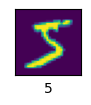

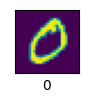

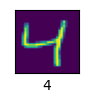

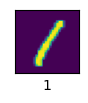

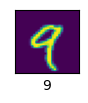

In [30]:
plt.figure(figsize=(5,5))
for i in range(5):
  plt.subplot(5,5,i+1)  
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i].reshape(28, 28))
  plt.xlabel(y_train[i])
  plt.show()


Describing the Network architecture

In [65]:
#Define input
inputs = keras.Input(shape=(784,))
#Define first layer
dense=layers.Dense(1024, activation="relu",name="HiddenLayer1")

#Connecting first layer with input
x=dense(inputs)

In [66]:
#Defining 2nd layer
dense2=layers.Dense(1024, activation="relu",name="HiddenLayer2")
x=dense2(x)

#Defining 3rd layer
x = layers.Dense(1024, activation="relu",name="HiddenLayer3")(x)

#Defining 4th layer
x = layers.Dense(1024, activation="relu",name="HiddenLayer4")(x)

#Defining output layer
outputs=layers.Dense(10,name="OutputLayer")(x)
#outputs=layers.Activation("softmax")(x)

In [67]:
#Defining the model
model=keras.Model(inputs=inputs, outputs=outputs, name="Mnist_model")

In [ ]:
model.summary()

Model: "Mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 1024)              803840    
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 1024)              1049600   
_________________________________________________________________
HiddenLayer3 (Dense)         (None, 1024)              1049600   
_________________________________________________________________
HiddenLayer4 (Dense)         (None, 1024)              1049600   
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                10250     
Total params: 3,962,890
Trainable params: 3,962,890
Non-trainable params: 0
_____________________________________________

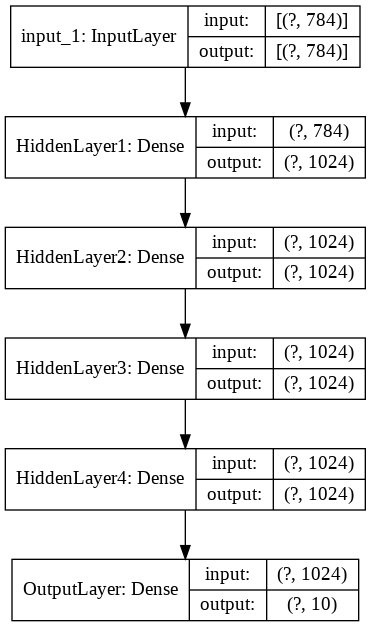

In [ ]:
#Visualizing the model
keras.utils.plot_model(model,"mnistmodel.png",show_shapes=True)

In [70]:
#Specifing the model loss, optimizer and accuracy metrics
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]

)

In [71]:
#Fitting the model
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.2)

750/750 [==============================] - 2s 3ms/step - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.2099 - val_accuracy: 0.9794
Epoch 44/50
750/750 [==============================] - 2s 3ms/step - loss: 0.0187 - accuracy: 0.9973 - val_loss: 0.1711 - val_accuracy: 0.9802
Epoch 45/50
750/750 [==============================] - 2s 3ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.1609 - val_accuracy: 0.9827
Epoch 46/50
750/750 [==============================] - 2s 3ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.2329 - val_accuracy: 0.9809
Epoch 47/50
750/750 [==============================] - 2s 3ms/step - loss: 0.0198 - accuracy: 0.9962 - val_loss: 0.2348 - val_accuracy: 0.9791
Epoch 48/50
750/750 [==============================] - 2s 3ms/step - loss: 0.0153 - accuracy: 0.9974 - val_loss: 0.2082 - val_accuracy: 0.9823
Epoch 49/50
750/750 [==============================] - 2s 3ms/step - loss: 0.0099 - accuracy: 0.9981 - val_loss: 0.2418 - val_accuracy: 0.9833
Epoch 50/50

In [72]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.2320 - accuracy: 0.9814
Test loss: 0.23196691274642944
Test accuracy: 0.9814000129699707


## **Problem 1.3**

In [34]:
from sklearn.utils import shuffle
#Shuffling images and labels and taking out a sample of 1000
shuffled_images,shuffled_labels  = shuffle(x_test, y_test, n_samples=1000)

In [73]:
print(shuffled_images.shape)
print(shuffled_labels.shape)

(1000, 784)
(1000,)


In [74]:
#Using our trained model to predict on 1000 test images
predictions=model.predict(shuffled_images, batch_size=10,verbose=0)

In [ ]:
rounded_predictions=np.argmax(predictions,axis=1)

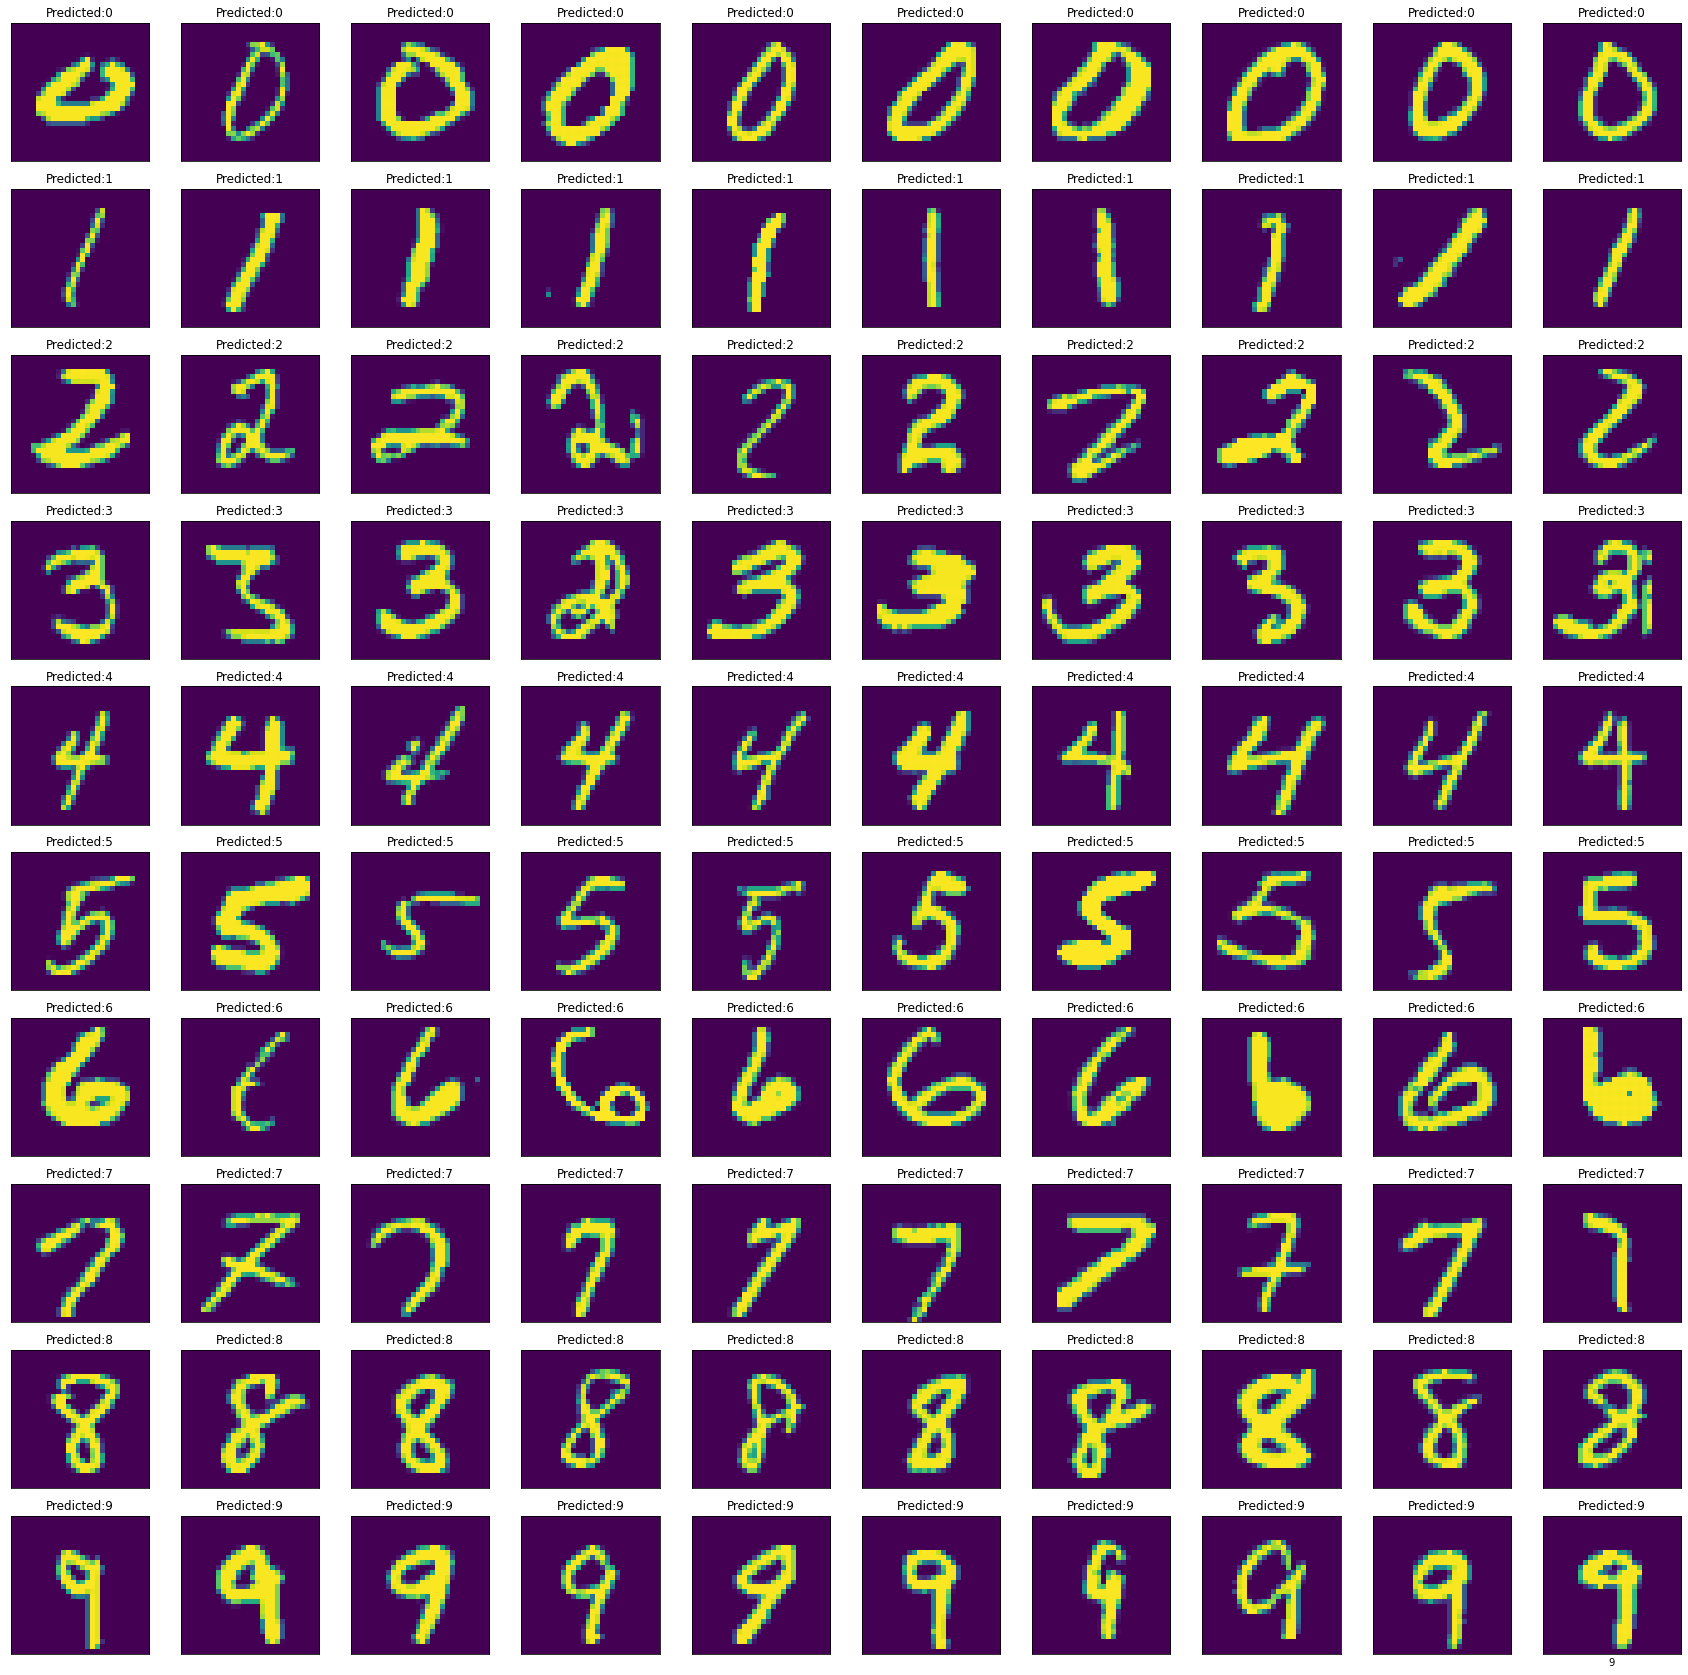

In [ ]:
fig, axes = plt.subplots(10,10, figsize=(30,30),
                         sharex=True, sharey=True,
                         subplot_kw=dict(aspect='equal'))

for i in range(10):
  number_idx=np.where(rounded_predictions==i)
  for j in range(10):
    indx=number_idx[0][j]
    ax=axes[i,j]
    img=shuffled_images[indx].reshape(28, 28)
    ax.imshow(img)
    ax.set_title("Predicted:"+str(i))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(i)
plt.show()

Problem **1.4**

In [ ]:
from keras.models import Model

In [ ]:
#Define input
inputs = keras.Input(shape=(784,))
#Define first layer
dense=layers.Dense(1024, activation="relu",name="HiddenLayer1")

#Connecting first layer with input
x=dense(inputs)
#Defining 2nd layer
dense2=layers.Dense(1024, activation="relu",name="HiddenLayer2")
x=dense2(x)

#Defining 3rd layer
x = layers.Dense(1024, activation="relu",name="HiddenLayer3")(x)

#Defining 4th layer
x = layers.Dense(1024, activation="relu",name="HiddenLayer4")(x)

outputs=layers.Activation("softmax")(x)

In [ ]:
#Output 1024 dimensional vector on which we apply softmax function
intermediate_layer_model=keras.Model(inputs=inputs, outputs=outputs, name="Mnist_modeltemp")

In [ ]:
intermediate_layer_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
#Predicting with this intermediate model on our test data
predictions1=intermediate_layer_model.predict(shuffled_images)

In [ ]:
predictions1.shape

(1000, 1024)

In [ ]:
#Picking up 10 random dimensions out of thes 1024

rand_dim = np.random.choice(1024, 10,replace=False)

In [ ]:
sample_output = predictions1[:,rand_dim]

In [ ]:
sample_output.shape

(1000, 10)

In [ ]:
rounded_predictions1=np.argmax(sample_output,axis=1)
print(rounded_predictions1.shape)

(1000,)


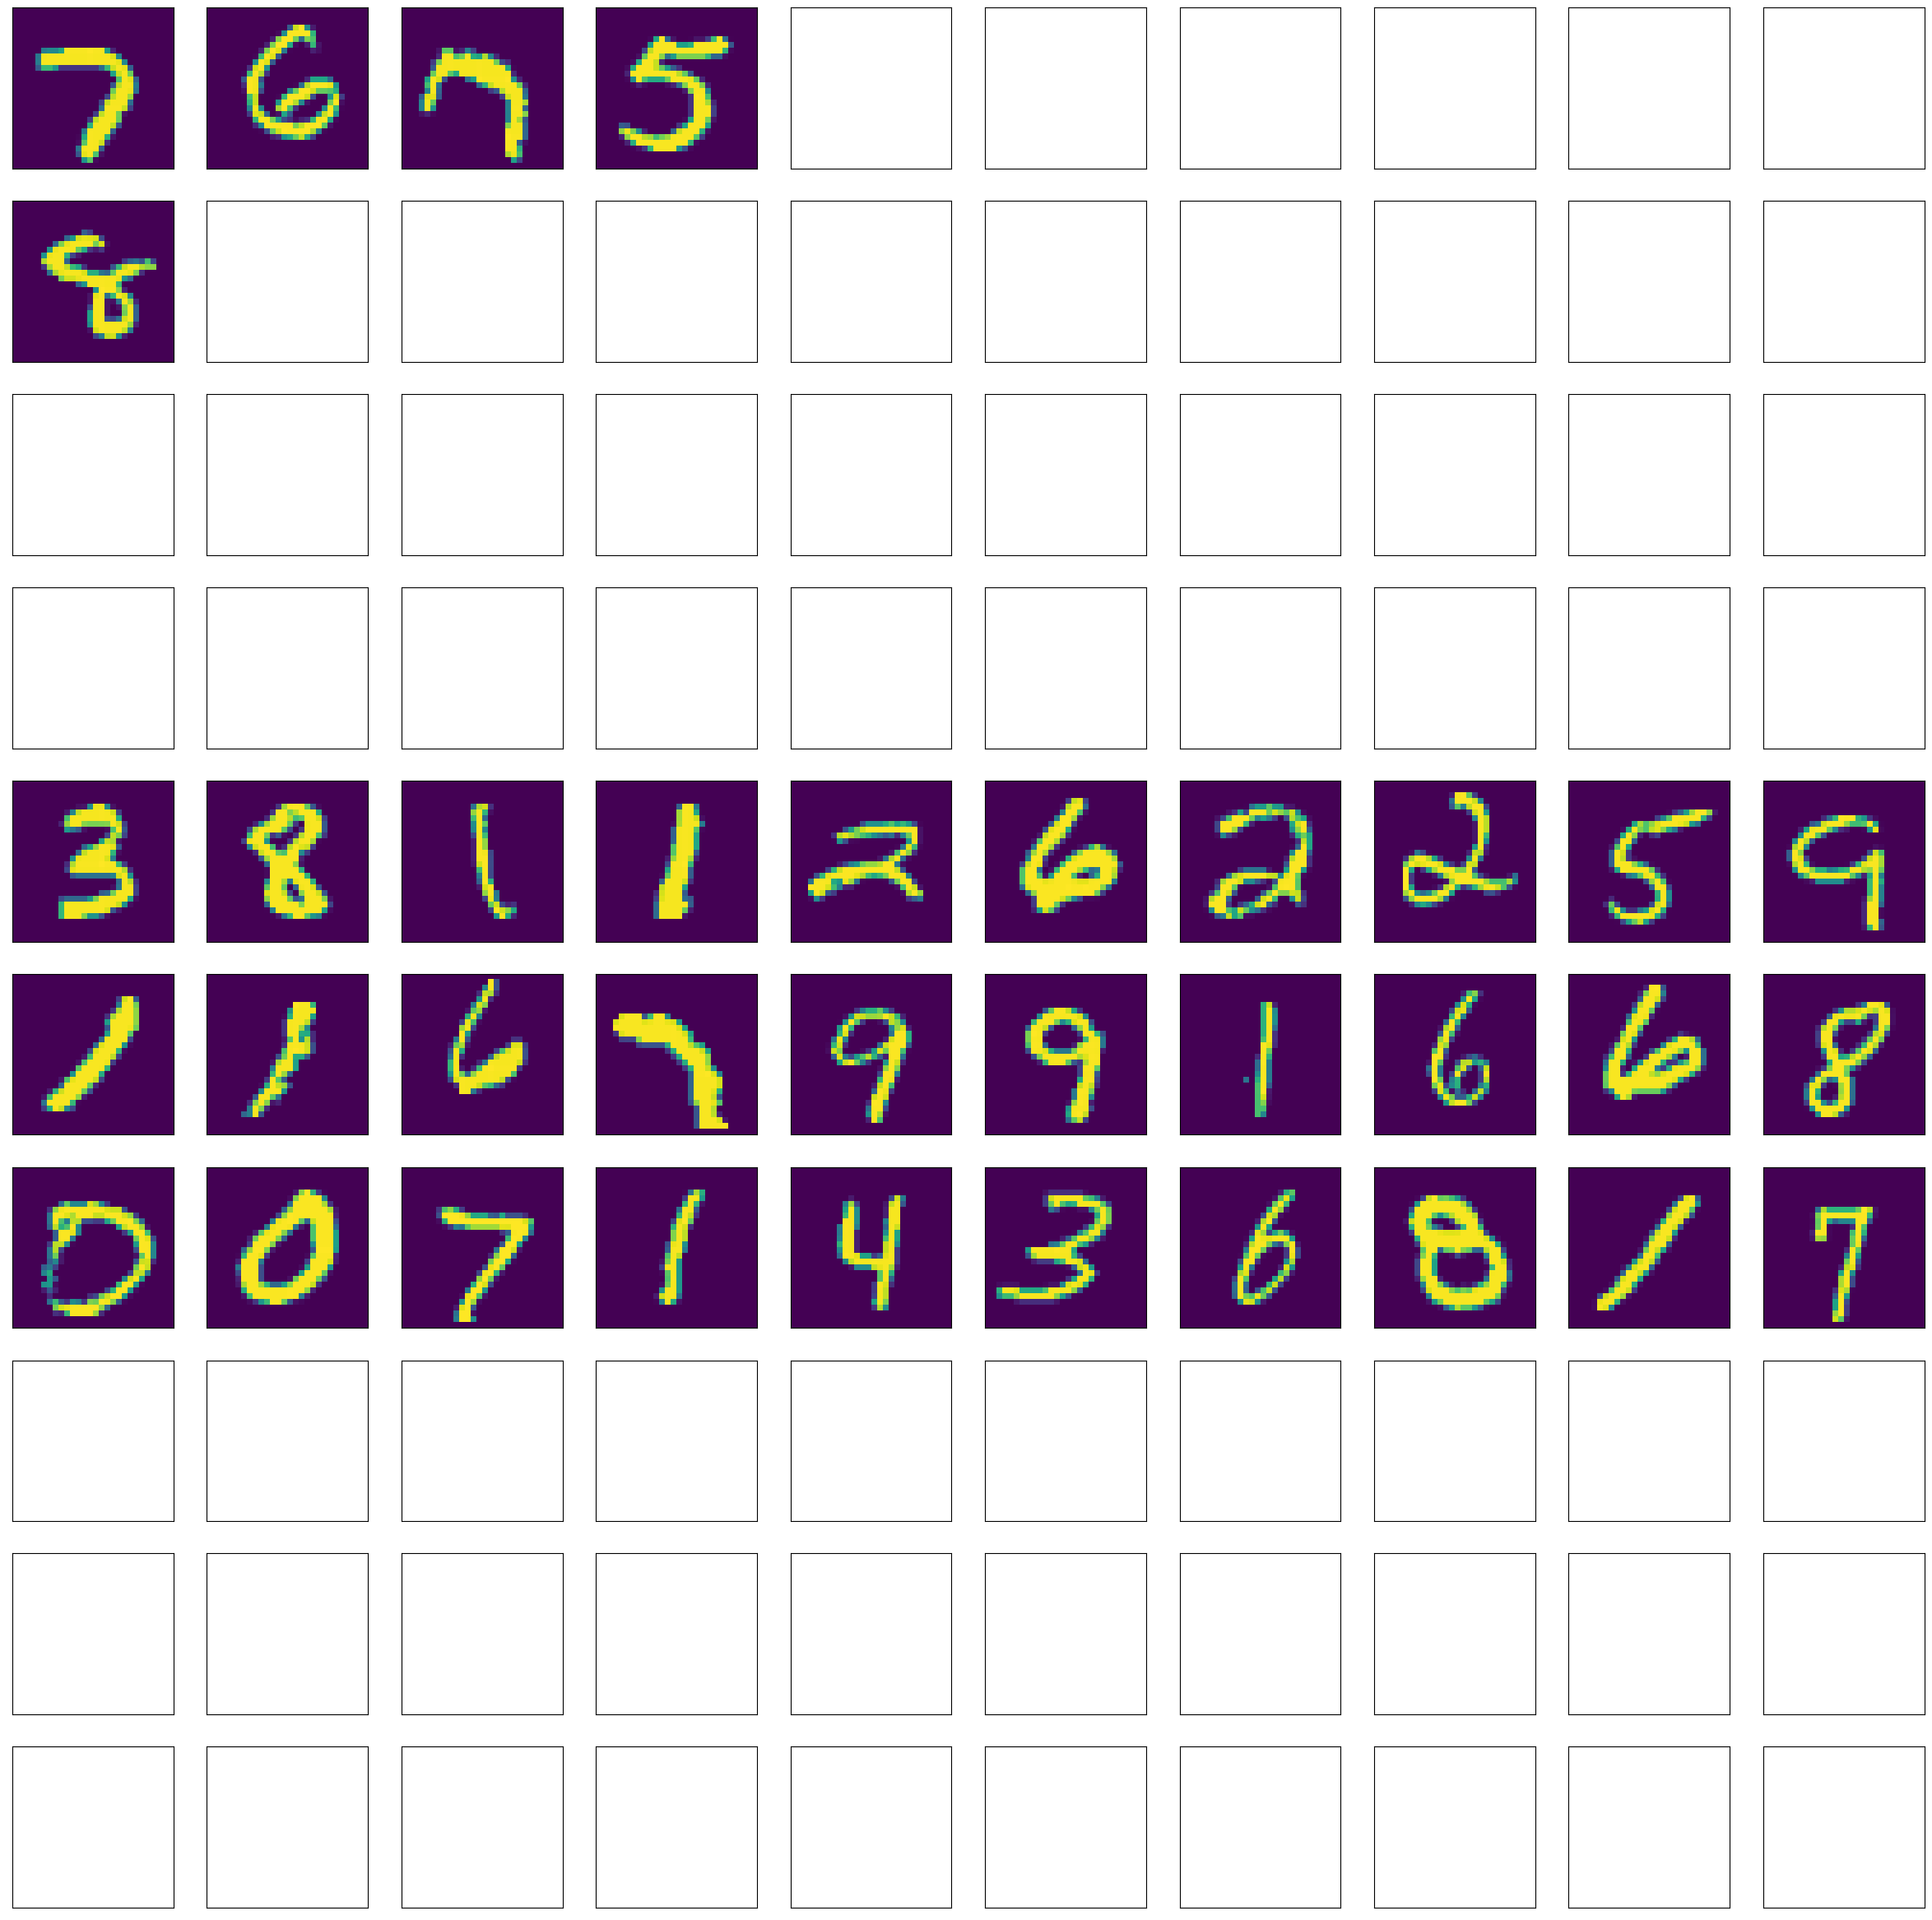

In [ ]:
counter = { 0: 0, 1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0} 
max_plots = 10

fig, axes = plt.subplots(10,10, figsize=(30,30),
                         sharex=True, sharey=True,
                         subplot_kw=dict(aspect='equal'))
data=shuffled_images

for index,predictionn in enumerate(rounded_predictions1):
  if (counter[predictionn] < max_plots):
    img = data[index].reshape(28,28)
    ax=axes[predictionn,counter[predictionn]]
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    
    counter[predictionn] +=1

plt.show()



**We see here that we use 1024 units in our final layer to predict our 10 labels instead of 10 units like in 1.3(which predicted our labels very well). This gives us really bad results. This is because activations alone are like features of the image. When we randomly select 10 activations out of these 1024 activaions to predict our labels, it is quite possible that these randomly chosen features are not able to predict for any of test cases. Hence the blanks boxes for those labels. And even when it predicted based on the activations, due to the randomness of the activations, it mostly got the predictions wrong which is clearly evident in the grid above.**

**Problem 1.5 1.6**

In [35]:
#Take 1000 test samples from Mnist
x_test1=shuffled_images
y_test1= shuffled_labels

In [36]:
print(x_test1.shape)
print(y_test1.shape)

(1000, 784)
(1000,)


In [37]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns


In [38]:
feat_cols = ['Feature'+str(i) for i in range(x_test1.shape[1]) ]
df = pd.DataFrame(x_test1)
df = pd.DataFrame(x_test1,columns=feat_cols)
df['y'] = y_test1
df['label'] = df['y'].apply(lambda i: str(i))

In [40]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 

In [49]:
rndperm = np.random.permutation(df.shape[0])

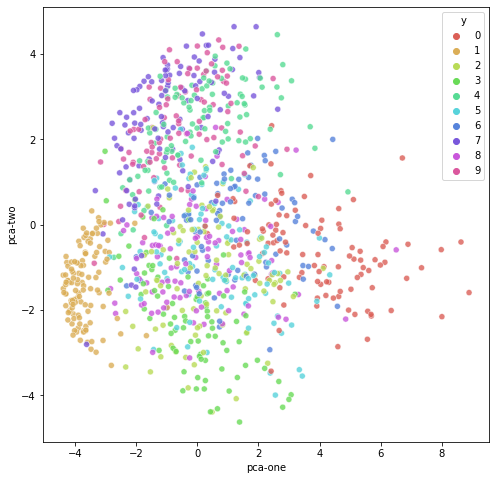

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    #data=df.loc[rndperm,:],
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.8
)

In [61]:
df_subset = df.loc[rndperm[:1000],:].copy()
data_subset = df_subset[feat_cols].values
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.057s...
[t-SNE] Computed neighbors for 1000 samples in 1.661s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.819798
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.210129
[t-SNE] KL divergence after 300 iterations: 1.139938


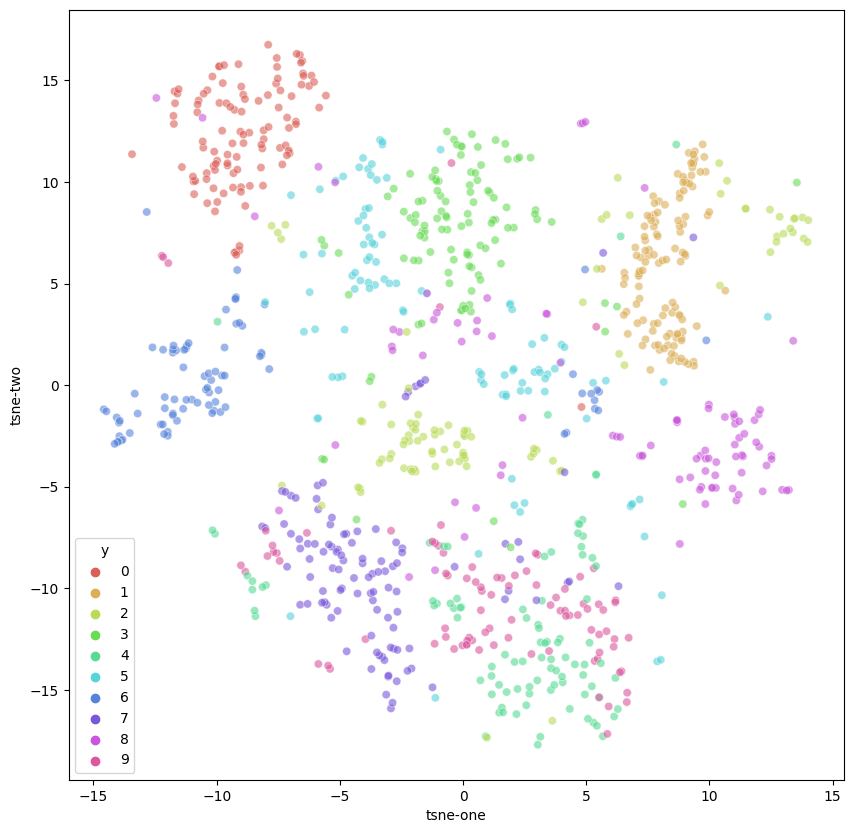

In [60]:
df_subset['tsne-one'] = tsne_results[:,0]
df_subset['tsne-two'] = tsne_results[:,1]
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.6
)

**As we can clearly see, TSNE does a much better job at classifying the test examples and making clusters. Since these are 1000 randomly selected test samples, the results will vary according to the sample. By looking at the TSNE plot, we can surely say that the data could be possibily classified successfully which we saw from our MNIST classification using a deep neural network. But in the current feature space, it looks kind of hard.**


**Problem 1.7 1.8**

In [68]:
from keras import backend as K
inp=model.input # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs

In [69]:
len(outputs)

6

In [75]:
tsne=tsne = TSNE(n_components = 2)
pca = PCA(n_components = 2)
test_labels = shuffled_labels
c = np.argmax(predictions, axis = 1)

In [76]:
def get_plots_pca(pca, c, data, title):
  
  result = pca.fit_transform(data)

  plt.scatter(result[:, 0], result[:, 1], c = c , cmap = "Spectral")
  
  for i in range(10):
      class_label=str(i)
      indx = list(np.where(c == i)[0])
      x,y = (np.mean(result[indx], axis =0))
      plt.annotate(class_label, xy=(x,y))
      plt.title('Plot for '+ title)
  plt.show()

In [77]:
def get_plots_tsne(tsne, c, data, title):
  
  result = tsne.fit_transform(data)
  plt.scatter(result[:, 0], result[:, 1], c = c , cmap = "Spectral")
  
  for i in range(10):
      class_label=str(i)
      indx = list(np.where(c == i)[0])
      x,y = (np.mean(result[indx], axis =0))
      plt.annotate(class_label, xy=(x,y))
      plt.title('Plot for '+ title)
  plt.show()

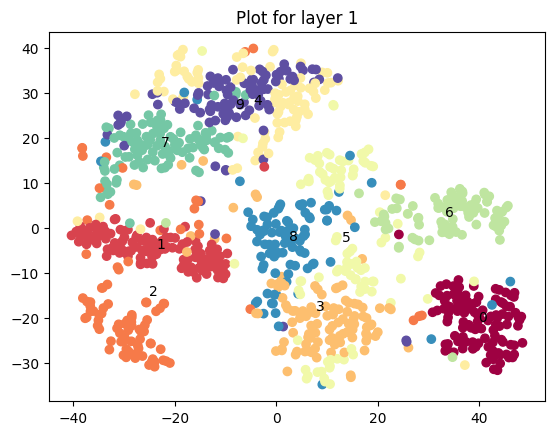

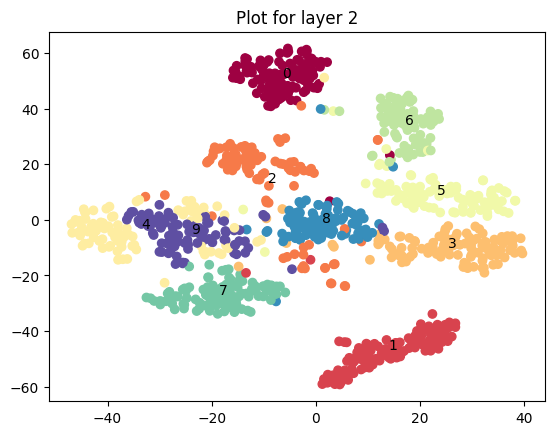

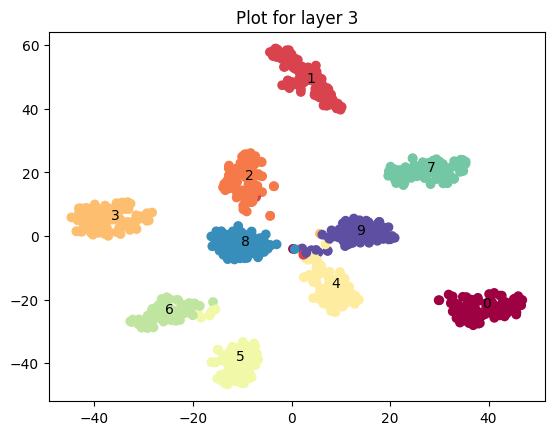

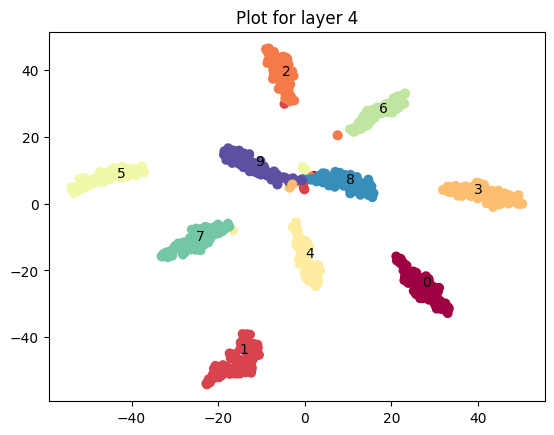

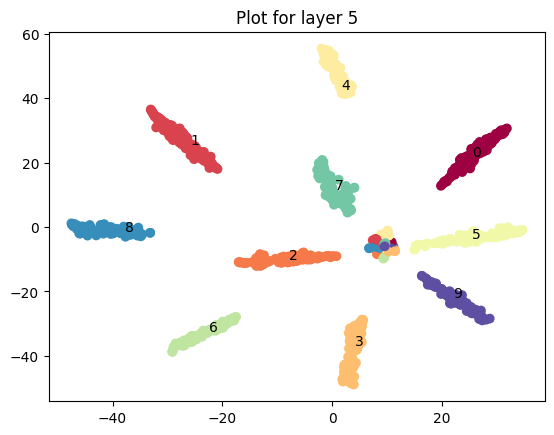

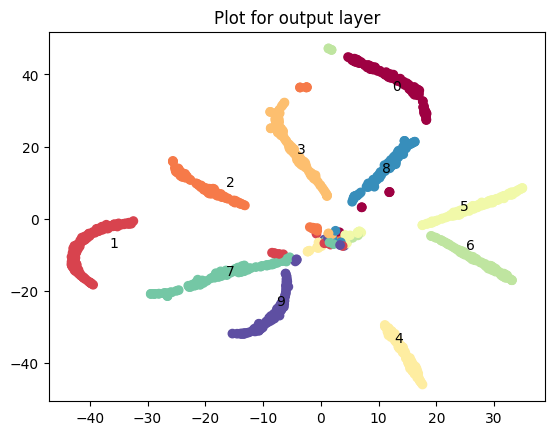

In [79]:
for i in range(len(outputs)):
  get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[i].output])

  layer_output = np.array(get_layer_output([shuffled_images]))
  t1=layer_output
  t2=t1.reshape(layer_output.shape[1],layer_output.shape[2])
  if i <= 4:
    title = "layer " + str(i+1)
  else: 
    title = "output layer"
  get_plots_tsne(tsne, c, t2, title)

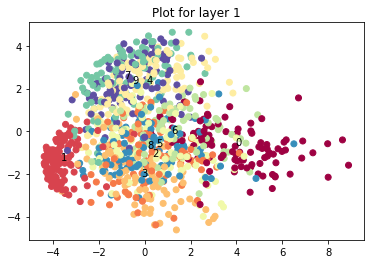

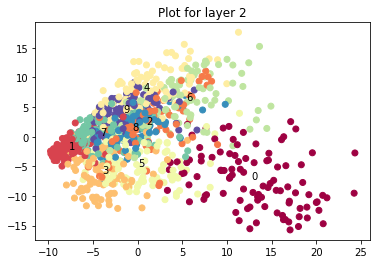

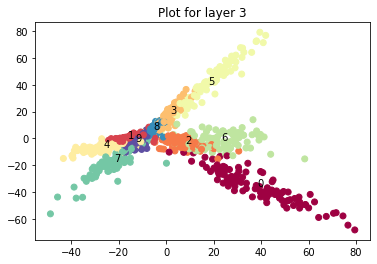

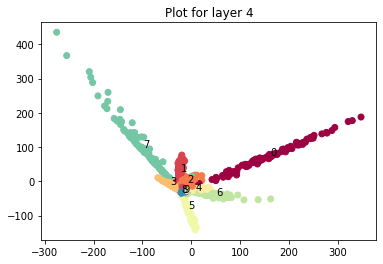

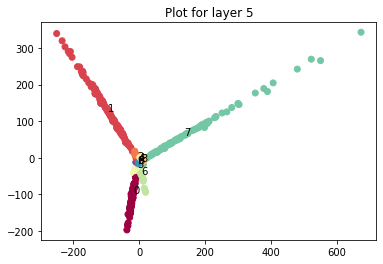

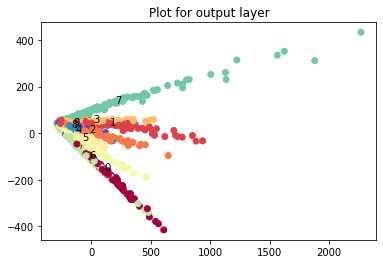

In [ ]:
for i in range(len(outputs)):
  get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[i].output])

  layer_output = np.array(get_layer_output([shuffled_images]))
  t1=layer_output
  t2=t1.reshape(layer_output.shape[1],layer_output.shape[2])
  if i <= 4:
    title = "layer " + str(i+1)
  else: 
    title = "output layer"
  get_plots_pca(pca, c, t2, title)

**Answer 1.7 1.8: From these graphs if we see the plots with TSNE & PCA applied on hidden layer 1, we can see that TSNE is able to classify the labels much better than with no hidden layer in problem 1.6. And as we go on adding layers, the distinction keeps on getting better.This trend is not seen that clearly with PCA but it still exists. The reason that TSNE plots are better than PCA plots is because TSNE algorithm tries to keep the original pattern in the data when it is being projected to lower dimensions. PCA, on the other hand,tries to find those 2 key principal components which help explain the maximum variance in the data not keeping in mind the original data** 

Problem 2:

In [ ]:
#!pip install librosa # in colab, you’ll need to install this 
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

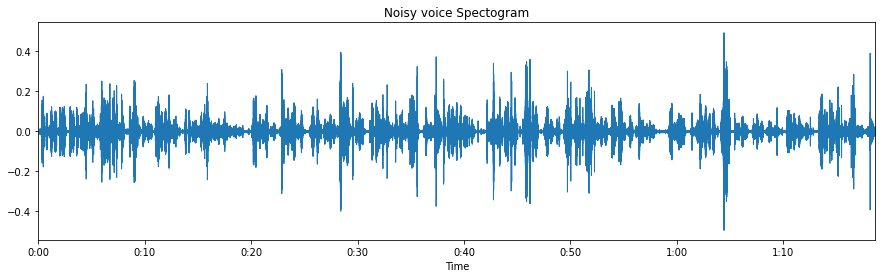

In [ ]:
#Input voice signal-Noisy voice
sn, sr=librosa.load('/content/drive/My Drive/train_dirty_male.wav', sr=None) 
X=librosa.stft(sn, n_fft=1024, hop_length=512)
x_train=np.transpose(np.abs(X))
plt.figure(figsize=(15,4))
plt.title("Noisy voice Spectogram")
librosa.display.waveplot(sn,sr=sr, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

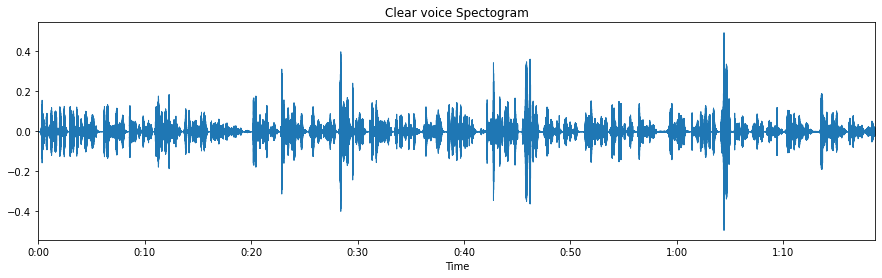

In [ ]:
#Output voice signal-Clear voice
s, sr2=librosa.load('/content/drive/My Drive/train_clean_male.wav', sr=None) 
S=librosa.stft(s, n_fft=1024, hop_length=512)
y_train=np.transpose(np.abs(S))
plt.figure(figsize=(15,4))
plt.title("Clear voice Spectogram")
librosa.display.waveplot(s,sr=sr2, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2459, 513)
(2459, 513)


In [ ]:
#Initializing Keras Model & adding layers
model = Sequential()
model.add(Dense(units=1024, activation=tf.nn.elu))
model.add(Dense(units=1024, activation=tf.nn.elu))
model.add(Dense(units=513, activation='relu'))

In [ ]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.RMSprop())

In [ ]:
model.fit(x_train, y_train, epochs=1000, batch_size=100)

Epoch 1/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 11/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 12/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 13/1000
25/25 [====

In [ ]:
#Input variable-noisy voice1
snt, srt=librosa.load('/content/drive/My Drive/test_x_01.wav', sr=None) 
Xt=librosa.stft(snt, n_fft=1024, hop_length=512)
x_test_abs = np.abs(Xt)
x_test = np.transpose(x_test_abs)

In [ ]:
print(x_test.shape)

(142, 513)


In [ ]:
prediction = model.predict(x_test,batch_size=16)

(142, 513)

In [ ]:
prediction_complex = np.multiply(np.divide(Xt,x_test_abs),prediction.T)
prediction_timedomain = librosa.istft(prediction_complex,hop_length=512, win_length=1024)

In [ ]:
prediction_timedomain

array([ 5.3450443e-05, -8.1638227e-06, -1.5331217e-04, ...,
        1.1108624e-03,  2.3690579e-03,  3.1520883e-03], dtype=float32)

In [ ]:
librosa.output.write_wav('test_cx_01_reconst.wav', prediction_timedomain, srt)

**Test sample voice Noisy**

In [ ]:
ipd.Audio('/content/drive/My Drive/test_x_01.wav')

**Reconstructed sample**



In [ ]:
ipd.Audio('test_cx_01_reconst.wav')

In [ ]:
from google.colab import files

#files.download('test_cx_01_reconst.wav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#noisy voice2
sn2, srt2=librosa.load('/content/drive/My Drive/test_x_02.wav', sr=None) 
St=librosa.stft(sn2, n_fft=1024, hop_length=512)
x_test2_abs = np.abs(St)
x_test2 = np.transpose(x_test2_abs)

In [ ]:
print(x_test2.shape)

(380, 513)


In [ ]:
prediction2 = model.predict(x_test2,batch_size=16)
prediction_complex2 = np.multiply(np.divide(St,x_test2_abs),prediction2.T)
prediction_timedomain2 = librosa.istft(prediction_complex2,hop_length=512, win_length=1024)


In [ ]:
librosa.output.write_wav('test_cx_02_reconst.wav', prediction_timedomain2, srt)
#files.download('test_cx_02_reconst.wav')

In [ ]:
ipd.Audio('/content/drive/My Drive/test_x_02.wav')

In [ ]:
ipd.Audio('test_cx_02_reconst.wav')

**Problem 3**

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [ ]:
#Loading the dataset
mnist = tf.keras.datasets.mnist

#Train test data separate
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, 784])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, 784])
x_test = x_test.astype('float32') / 255

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
model=Sequential()
model.add(tf.keras.layers.Dense(512,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=0.01)))
model.add(tf.keras.layers.Dense(512,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=0.01)))
model.add(tf.keras.layers.Dense(512,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=0.01)))
model.add(tf.keras.layers.Dense(512,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=0.01)))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


model.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=0.1),
              metrics=["accuracy"])


history = model.fit(x_train, y_train, batch_size=64, epochs=50,validation_data=(x_test, y_test))

model.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=["accuracy"])

historyA1=model.fit(x_train, y_train, batch_size=64, epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3452 - accuracy: 0.1015 - val_loss: 2.3380 - val_accuracy: 0.1028
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3104 - accuracy: 0.1041 - val_loss: 2.3033 - val_accuracy: 0.1135
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3060 - accuracy: 0.1038 - val_loss: 2.3055 - val_accuracy: 0.0982
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3044 - accuracy: 0.1057 - val_loss: 2.3049 - val_accuracy: 0.1135
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3035 - accuracy: 0.1079 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3029 - accuracy: 0.1083 - val_loss: 2.3037 - val_accuracy: 0.1028
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1087 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 

In [ ]:
history.history()

In [ ]:
model2=Sequential()
model2.add(Dense(512,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
model2.add(Dense(512,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
model2.add(Dense(512,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
model2.add(Dense(512,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
model2.add(Dense(10,activation=tf.nn.softmax,kernel_initializer=tf.keras.initializers.GlorotNormal()))

model2.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=0.1),
              metrics=["accuracy"])

history2 = model2.fit(x_train, y_train, batch_size=64, epochs=50,validation_data=(x_test, y_test))

model2.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=["accuracy"])

history2A = model2.fit(x_train, y_train, batch_size=64, epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3457 - accuracy: 0.1058 - val_loss: 2.3241 - val_accuracy: 0.1028
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3039 - accuracy: 0.1151 - val_loss: 2.2931 - val_accuracy: 0.1135
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 2.2521 - accuracy: 0.1691 - val_loss: 1.9737 - val_accuracy: 0.4051
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 1.3214 - accuracy: 0.5141 - val_loss: 1.0746 - val_accuracy: 0.6255
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.7944 - accuracy: 0.7340 - val_loss: 0.6722 - val_accuracy: 0.7842
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.6409 - accuracy: 0.8020 - val_loss: 0.5816 - val_accuracy: 0.8286
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5421 - accuracy: 0.8411 - val_loss: 0.5217 - val_accuracy: 0.8430
Epoch 

In [ ]:
model3=Sequential()
model3.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=0.01)))
model3.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=0.01)))
model3.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=0.01)))
model3.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=0.01)))
model3.add(Dense(10,activation=tf.nn.softmax,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=0.01)))

model3.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=0.1),
              metrics=["accuracy"])

history3 = model3.fit(x_train, y_train, batch_size=64, epochs=50,validation_data=(x_test, y_test))

model3.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=["accuracy"])

history3A = model3.fit(x_train, y_train, batch_size=64, epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1116 - val_loss: 2.3003 - val_accuracy: 0.1135
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 1.9446 - accuracy: 0.2606 - val_loss: 0.9523 - val_accuracy: 0.6918
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.4425 - accuracy: 0.8717 - val_loss: 0.2621 - val_accuracy: 0.9314
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2213 - accuracy: 0.9420 - val_loss: 0.2337 - val_accuracy: 0.9368
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1485 - accuracy: 0.9607 - val_loss: 0.1638 - val_accuracy: 0.9557
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1062 - accuracy: 0.9711 - val_loss: 0.1310 - val_accuracy: 0.9658
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0786 - accuracy: 0.9779 - val_loss: 0.1588 - val_accuracy: 0.9594
Epoch 

In [ ]:
model4=Sequential()
model4.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.GlorotNormal()))
model4.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.GlorotNormal()))
model4.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.GlorotNormal()))
model4.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.GlorotNormal()))
model4.add(Dense(10,activation=tf.nn.softmax,kernel_initializer=tf.keras.initializers.GlorotNormal()))

model4.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=0.1),
              metrics=["accuracy"])

history4 = model4.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

model4.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=["accuracy"])

history4A = model4.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 0.3189 - accuracy: 0.9046 - val_loss: 0.1474 - val_accuracy: 0.9540
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1084 - accuracy: 0.9668 - val_loss: 0.1002 - val_accuracy: 0.9701
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0697 - accuracy: 0.9780 - val_loss: 0.0749 - val_accuracy: 0.9762
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0722 - val_accuracy: 0.9777
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0663 - val_accuracy: 0.9786
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0697 - val_accuracy: 0.9805
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.0690 - val_accuracy: 0.9802
Epoch 

In [ ]:
print("Hello")

Hello


In [ ]:
model5=Sequential()
model5.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
model5.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
model5.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
model5.add(Dense(512,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
model5.add(Dense(10,activation=tf.nn.softmax,kernel_initializer=tf.keras.initializers.HeNormal()))

model5.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=0.1),
              metrics=["accuracy"])

history5 = model5.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

model5.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=["accuracy"])

history5A = model5.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

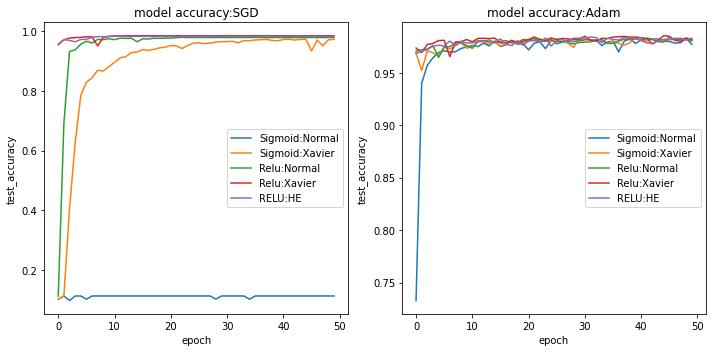

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy:SGD')
plt.ylabel('test_accuracy')
plt.xlabel('epoch')
plt.legend(['Sigmoid:Normal', 'Sigmoid:Xavier','Relu:Normal','Relu:Xavier','RELU:HE'], loc='center right')

plt.subplot(1,2,2)
plt.plot(historyA1.history['val_accuracy'])
plt.plot(history2A.history['val_accuracy'])
plt.plot(history3A.history['val_accuracy'])
plt.plot(history4A.history['val_accuracy'])
plt.plot(history5A.history['val_accuracy'])
plt.title('model accuracy:Adam')
plt.ylabel('test_accuracy')
plt.xlabel('epoch')
plt.legend(['Sigmoid:Normal', 'Sigmoid:Xavier','Relu:Normal','Relu:Xavier','RELU:HE'], loc='center right')

plt.tight_layout()


# Problem 4

In [15]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

#Loading the dataset
mnist = tf.keras.datasets.mnist

#Train test data separate
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
x_train = np.reshape(x_train, [-1, 784])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, 784])
x_test = x_test.astype('float32') / 255

In [16]:
modelND=Sequential()
modelND.add(Dense(1024,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
modelND.add(Dense(1024,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
modelND.add(Dense(1024,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
modelND.add(Dense(1024,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
modelND.add(Dense(10,activation=tf.nn.softmax,kernel_initializer=tf.keras.initializers.GlorotNormal()))


modelND.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=["accuracy"]
              )

historyND = modelND.fit(x_train, y_train, batch_size=128, epochs=500, validation_data=(x_test, y_test))


469/469 [==============================] - 2s 4ms/step - loss: 7.5499e-11 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9867
Epoch 497/500
469/469 [==============================] - 2s 4ms/step - loss: 7.5499e-11 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9867
Epoch 498/500
469/469 [==============================] - 2s 4ms/step - loss: 7.1526e-11 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9867
Epoch 499/500
469/469 [==============================] - 2s 4ms/step - loss: 7.1526e-11 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9867
Epoch 500/500
469/469 [==============================] - 2s 4ms/step - loss: 7.3512e-11 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9867


In [17]:
modelND1=Sequential()

modelND1.add(Dense(1024,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
modelND1.add(Dense(1024,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
modelND1.add(Dense(1024,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
modelND1.add(Dense(1024,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
modelND1.add(Dense(10,activation=tf.nn.softmax,kernel_initializer=tf.keras.initializers.HeNormal()))


modelND1.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=["accuracy"]
              )

historyND1 = modelND1.fit(x_train, y_train, batch_size=128, epochs=500, validation_data=(x_test, y_test))

469/469 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3315 - val_accuracy: 0.9860
Epoch 497/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3315 - val_accuracy: 0.9860
Epoch 498/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3316 - val_accuracy: 0.9860
Epoch 499/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3316 - val_accuracy: 0.9860
Epoch 500/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3316 - val_accuracy: 0.9860


In [18]:
modelD=Sequential()
modelD.add(Dense(1024,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
modelD.add(Dropout(0.20))
modelD.add(Dense(1024,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
modelD.add(Dropout(0.50))
modelD.add(Dense(1024,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
modelD.add(Dropout(0.50))
modelD.add(Dense(1024,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.GlorotNormal()))
modelD.add(Dropout(0.50))
modelD.add(Dense(10,activation=tf.nn.softmax,kernel_initializer=tf.keras.initializers.GlorotNormal()))


modelD.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=["accuracy"]
              )

historyD = modelD.fit(x_train, y_train, batch_size=128, epochs=500, validation_data=(x_test, y_test))

469/469 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.1987 - val_accuracy: 0.9865
Epoch 497/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.1912 - val_accuracy: 0.9876
Epoch 498/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1928 - val_accuracy: 0.9872
Epoch 499/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.1984 - val_accuracy: 0.9863
Epoch 500/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.2030 - val_accuracy: 0.9859


In [19]:
modelD1=Sequential()
modelD1.add(Dense(1024,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
modelD1.add(Dropout(0.20))
modelD1.add(Dense(1024,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
modelD1.add(Dropout(0.50))
modelD1.add(Dense(1024,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
modelD1.add(Dropout(0.50))
modelD1.add(Dense(1024,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.HeNormal()))
modelD1.add(Dropout(0.50))
modelD1.add(Dense(10,activation=tf.nn.softmax,kernel_initializer=tf.keras.initializers.HeNormal()))


modelD1.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=["accuracy"]
              )

historyD1 = modelD1.fit(x_train, y_train, batch_size=128, epochs=500, validation_data=(x_test, y_test))

469/469 [==============================] - 2s 4ms/step - loss: 0.1068 - accuracy: 0.9903 - val_loss: 4.8619 - val_accuracy: 0.9742
Epoch 497/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0717 - accuracy: 0.9895 - val_loss: 4.4194 - val_accuracy: 0.9722
Epoch 498/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0980 - accuracy: 0.9891 - val_loss: 4.8764 - val_accuracy: 0.9746
Epoch 499/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1908 - accuracy: 0.9872 - val_loss: 3.6393 - val_accuracy: 0.9726
Epoch 500/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1134 - accuracy: 0.9838 - val_loss: 3.2306 - val_accuracy: 0.9687


In [ ]:
t1=np.subtract(1,historyND.history['accuracy'])
t1

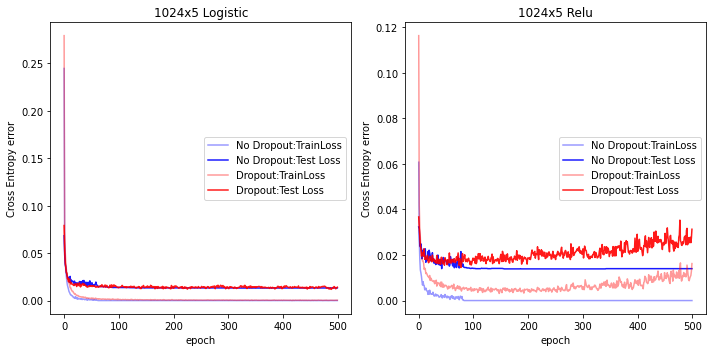

In [25]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.subtract(1,historyND.history['accuracy']),"blue",alpha=0.4)
plt.plot(np.subtract(1,historyND.history['val_accuracy']),"blue",alpha=0.9)
plt.plot(np.subtract(1,historyD.history['accuracy']),"red",alpha=0.4)
plt.plot(np.subtract(1,historyD.history['val_accuracy']),"red",alpha=0.9)
plt.title('1024x5 Logistic')
plt.ylabel('Cross Entropy error')
plt.xlabel('epoch')
plt.legend(['No Dropout:TrainLoss','No Dropout:Test Loss','Dropout:TrainLoss','Dropout:Test Loss'], loc='center right')

plt.subplot(1,2,2)
plt.plot(np.subtract(1,historyND1.history['accuracy']),"blue",alpha=0.4)
plt.plot(np.subtract(1,historyND1.history['val_accuracy']),"blue",alpha=0.9)
plt.plot(np.subtract(1,historyD1.history['accuracy']),"red",alpha=0.4)
plt.plot(np.subtract(1,historyD1.history['val_accuracy']),"red",alpha=0.9)
plt.title('1024x5 Relu')
plt.ylabel('Cross Entropy error')
plt.xlabel('epoch')
plt.legend(['No Dropout:TrainLoss','No Dropout:Test Loss','Dropout:TrainLoss','Dropout:Test Loss'], loc='center right')

plt.tight_layout()